# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers. 

Not sure where to begin? Scroll to the bottom to find challenges!

## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What five countries are responsible for the most profit (by quantity and price of goods sold)?
- 📊 **Visualize**: Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.
- 🔎 **Analyze**: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working for an online retailer. Currently, the retailer sells over 4000 unique products. To take inventory of the items, your manager has asked you whether you can group the products into a small number of categories. The categories should be similar in terms of price and quantity sold and any other characteristics you can extract from the data.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.




In [1]:
import pandas as pd
# Loading the file
df = pd.read_csv("online_retail.csv")

# First look into data
df.head()

print(df.dtypes)


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


# EDA

In [2]:
# Creating a new column that combines quantity sold and unit price
df["Quantity_x_price"] = df.Quantity * df.UnitPrice
df.Quantity_x_price.head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Quantity_x_price, dtype: float64

In [3]:
# First we will explore what countries are responsible for the most profit:
# Grouping the countries by quantities sold
by_country = df.groupby("Country")["Quantity_x_price"].sum()

print(by_country.sort_values())

Country
Saudi Arabia            1.311700e+02
Bahrain                 5.484000e+02
Czech Republic          7.077200e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.291750e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
USA                     1.730920e+03
United Arab Emirates    1.902280e+03
Malta                   2.505470e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.710520e+03
Unspecified             4.749790e+03
Poland                  7.213140e+03
Israel                  7.907820e+03
Singapore               9.120390e+03
Hong Kong               1.011704e+04
Austria                 1.015432e+04
Cyprus                  1.294629e+04
Italy                   1.689051e+04
Denmark                 1.876814e+04
Channel Islands         2.008629e+04
Finland                 2.232674e+04
Portugal                2.936702e+04
Norway                  3.5163

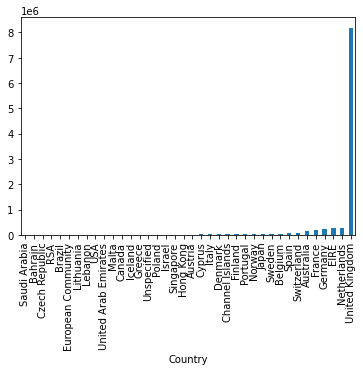

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sorting quantity by country
by_country_sorted = by_country.sort_values()

# Exploring the barplot
by_country_sorted.plot(kind="bar")
plt.show()



# Due to different scale, the standard barplot is not that usefull, therefore we will transform the y axis to logarithmic scale

Country
Japan             3.534062e+04
Sweden            3.659591e+04
Belgium           4.091096e+04
Spain             5.477458e+04
Switzerland       5.638535e+04
Australia         1.370773e+05
France            1.974039e+05
Germany           2.216982e+05
EIRE              2.632768e+05
Netherlands       2.846615e+05
United Kingdom    8.187806e+06
Name: Quantity_x_price, dtype: float64


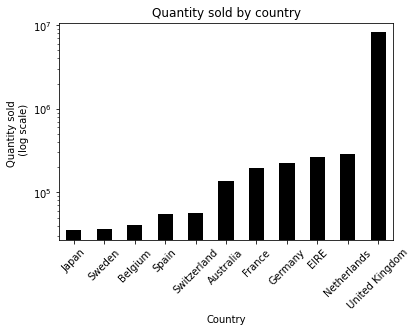

In [5]:
# Picking the top ten countries by quantity sold
top_ten = by_country_sorted["Japan":"United Kingdom"]
print(top_ten)

# Plotting a barplot of top ten countries by amount sold
top_ten.plot(kind="bar", color="black")
plt.yscale("log")
plt.xticks(rotation=45)
plt.ylabel("Quantity sold \n (log scale)")
plt.title("Quantity sold by country")
plt.show()

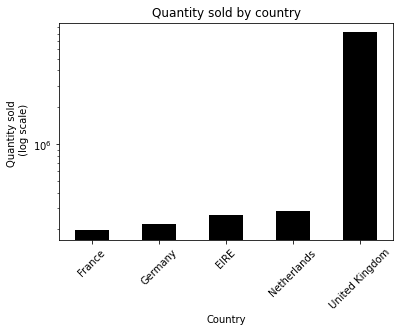

In [7]:
top_five = by_country_sorted["France":"United Kingdom"]

# Plotting a barplot of top five countries by amount sold
top_five.plot(kind="bar", color="black")
plt.yscale("log")
plt.xticks(rotation=45)
plt.ylabel("Quantity sold \n (log scale)")
plt.title("Quantity sold by country")
plt.show()

In the table above we can see that most of the sales are from UK, Netherlands, Irleand, Germany and France.

In [8]:
# Sorting the dataframe to see the mean order size by country
by_country_order_size = df.groupby("Country")["Quantity"].mean()
print(by_country_order_size.sort_values())

Country
USA                      3.553265
RSA                      6.068966
Unspecified              7.399103
Malta                    7.433071
Saudi Arabia             7.500000
European Community       8.147541
Lebanon                  8.577778
United Kingdom           8.605486
Italy                    9.961395
Cyprus                  10.155949
Spain                   10.589814
Portugal                10.651745
Greece                  10.657534
Poland                  10.712610
Brazil                  11.125000
Belgium                 11.189947
Austria                 12.037406
Germany                 12.369458
Channel Islands         12.505277
France                  12.911067
Iceland                 13.505495
Bahrain                 13.684211
United Arab Emirates    14.441176
Israel                  14.656566
Switzerland             15.147353
Finland                 15.346763
Hong Kong               16.559028
EIRE                    17.403245
Norway                  17.722836
Canada

In [6]:
# Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.
# To answer the following question, we will first transform the "InvoiceDate" column to a pd.datetime type
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate)

print(df.dtypes)

InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                 float64
Country                     object
Quantity_x_price           float64
dtype: object


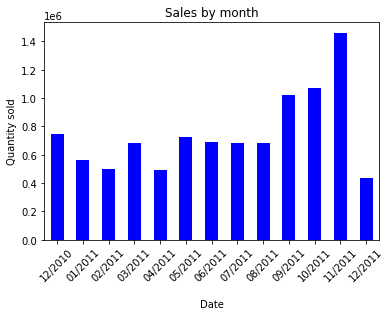

In [7]:
# Grouping the sales by month
by_month_sales = df.groupby(pd.Grouper(key='InvoiceDate', axis=1, 
                      freq='M'))["Quantity_x_price"].sum()

by_month_sorted = by_month_sales.sort_values(ascending=False)

# Plotting a bar chart to visualize sales by quarter
by_month_sales.plot(kind="bar", color="b")
ax= plt.axes()
# Setting x tick labels
ax.set_xticklabels(["12/2010", "01/2011", "02/2011", "03/2011", "04/2011", "05/2011", "06/2011", "07/2011", "08/2011", "09/2011", "10/2011", "11/2011", "12/2011"])
plt.xticks(rotation=45)
# Setting the title, x labels and y labels
plt.title("Sales by month")
plt.xlabel("\nDate")
plt.ylabel("Quantity sold")
plt.show()

InvoiceDate
2010-12-31     748957.020
2011-03-31    1741329.990
2011-06-30    1907663.751
2011-09-30    2383668.243
2011-12-31    2966128.930
Name: Quantity_x_price, dtype: float64


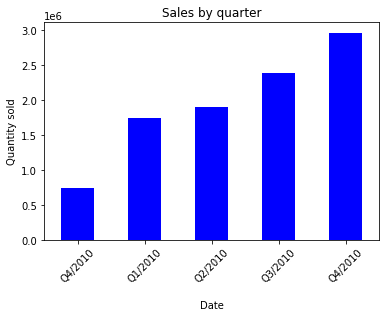

In [8]:
# Grouping the sales by quarter
by_quarter_sales = df.groupby(pd.Grouper(key='InvoiceDate', axis=1, 
                      freq='Q'))["Quantity_x_price"].sum()
# Sorting the values
by_quarter_sorted = by_quarter_sales.sort_values()
print(by_quarter_sorted)

# Plotting a bar chart to visualize sales by quarter
by_quarter_sorted.plot(kind="bar", color="b")
ax= plt.axes()
# Setting x tick labels
ax.set_xticklabels(["Q4/2010", "Q1/2010", "Q2/2010", "Q3/2010", "Q4/2010"])
plt.xticks(rotation=45)
# Setting the title, x labels and y labels
plt.title("Sales by quarter")
plt.xlabel("\nDate")
plt.ylabel("Quantity sold")
plt.show()

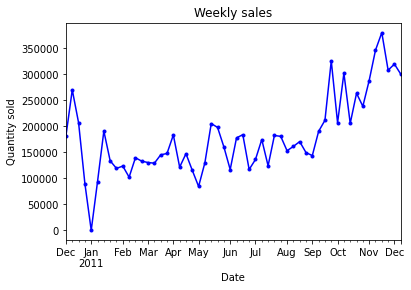

In [9]:
# Grouping the sales by quarter
by_week_sales = df.groupby(pd.Grouper(key='InvoiceDate', axis=1, 
                      freq='W'))["Quantity_x_price"].sum()

by_week_sales.sort_values(ascending=False)

# Plotting a linechart to visualize how sales change weekly
by_week_sales.plot(kind="line",marker=".", color="b")
plt.title("Weekly sales")
plt.ylabel("Quantity sold")
plt.xlabel("Date")
plt.show()